In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 黑体显示中文
plt.rcParams['font.sans-serif'] = ['Simhei']
# 正常显示符号
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-pastel')

In [32]:
data=pd.read_excel('上午考试数据源.xlsx').iloc[:,1:]
data

,招商银行,长安汽车,贵州茅台
0,16.717325,18.956044,3.551074
1,9.765200,18.475751,31.816257
2,-3.886398,-0.194932,0.000000
3,11.819596,30.859375,46.796210
4,0.556328,12.101476,20.394086
...,...,...,...
115,-1.445087,-13.842482,-5.540782
116,4.222874,2.216066,-2.589958
117,0.900394,4.268293,12.374547
118,-4.071389,-5.458090,0.210418


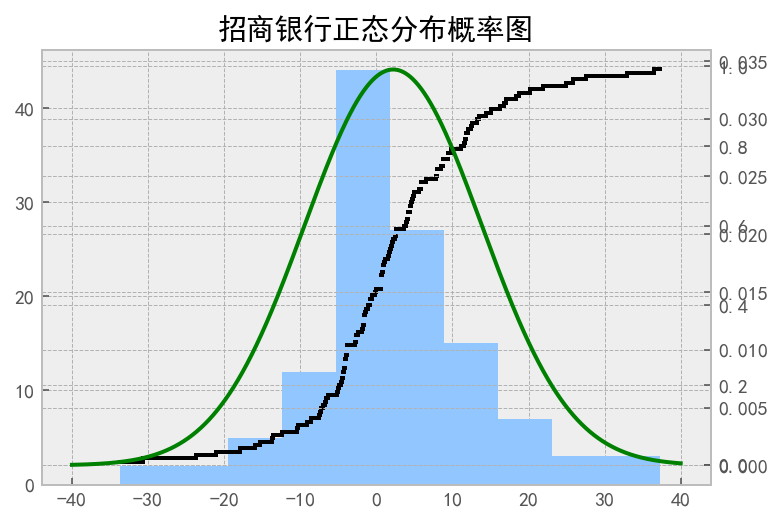

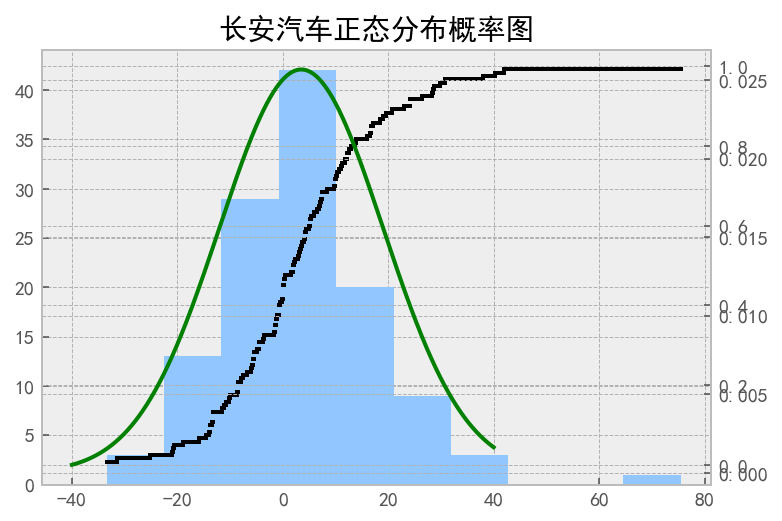

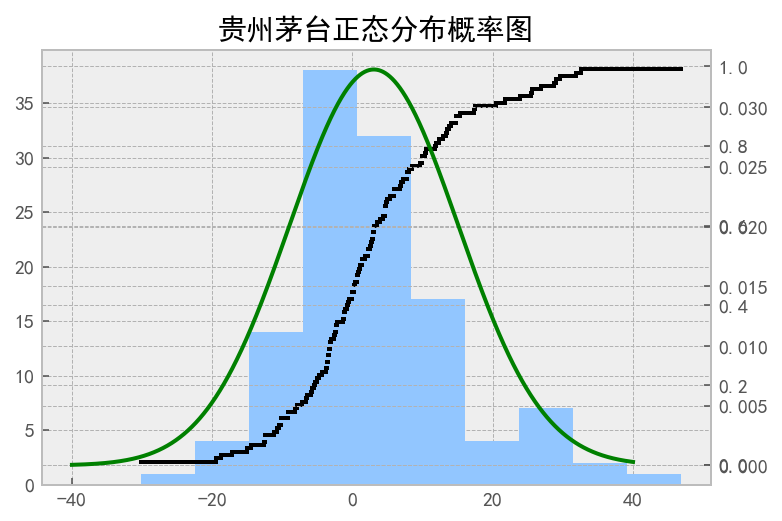

In [33]:
# 1. 先假设各公司个股收益率数据符合正态分布，绘制如图1所示图形，图中应包括：
# （1）数据分布直方图，及其正态分布概率图（即例图所示norm_pdf，注意其y轴已转化为频数，即左侧y轴；
# （2）经验累积概率分布曲线（图例累积分布），及其正态分布累计概率分布图（即例图所示norm_cdf, 注意累计概率值为右侧y轴）。（50%）
for i in data.columns:
    fig,ax1=plt.subplots()
    ax2=ax1.twinx()
    ax3=ax1.twinx()
    mean=data[i].mean()
    std=data[i].std()
    plt.xlabel('收益')
    plt.title(str(i)+'正态分布概率图')
    x = np.linspace(-40,40,100000)
    y = stats.norm.pdf(x,mean,std)
    # plt.bar(data[i])
    ax1.hist(data[i])
    ax3.plot(x,y,c="green")
    data_i=data[i].values.tolist()
    data_i.sort()
    last, j = min(data_i), 0
    while j < len(data_i):
        ax2.plot([last, data_i[j]], [j/len(data_i), j/len(data_i)], 'k')
        if j < len(data_i):
            last = data_i[j]
        j += 1
    plt.show()


In [5]:
# 2.检验正态分布 k-s检验
from scipy.stats import kstest
for i in data.columns:
   print(str(i)+'的正态检验结果为：')
   print(kstest(data[i],cdf = "norm"))
# 3.皮尔逊相关系数
print('计算皮尔逊相关系数结果为：'+str(data.corr(method='pearson')))

招商银行的正态检验结果为：
KstestResult(statistic=0.431360359315601, pvalue=8.336228567661425e-21)
长安汽车的正态检验结果为：
KstestResult(statistic=0.4849504689135528, pvalue=1.6427612359085585e-26)
贵州茅台的正态检验结果为：
KstestResult(statistic=0.45956223805678154, pvalue=1.0519814593389026e-23)
计算皮尔逊相关系数结果为：          招商银行      长安汽车      贵州茅台
招商银行  1.000000  0.440661  0.484106
长安汽车  0.440661  1.000000  0.342160
贵州茅台  0.484106  0.342160  1.000000
